# COVID-19 Visualization for Countries with Most Cases
Using dataset from this <a href="https://github.com/datasets/covid-19/blob/main/data/countries-aggregated.csv" >COVID-19 Github repository</a>,
I will be exploring the data to see the spread of the virus in six countries with most cases as of 5 February 2021:<br>
<ul>
<li>US</li>
<li>India</li>
<li>Brazil</li>
<li>Russia</li>
<li>Italy</li>
<li>France</li>
</ul>
I am using source code from <a href ="https://datagy.io/">Nik Piepenbreier</a> as seen in this <a href="https://towardsdatascience.com/visualizing-covid-19-data-beautifully-in-python-in-5-minutes-or-less-affc361b2c6a">article</a> he wrote on Medium.<br>

###### Loading Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
%matplotlib inline

###### Loading and selecting data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
countries = ['US', 'India', 'Brazil', 'Russia', 'France', 'Italy']
df = df[df['Country'].isin(countries)]

###### Creating summary column

In [3]:
df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
print(df)

            Date Country  Confirmed  Recovered  Deaths     Cases
8740  2020-01-22  Brazil          0          0       0         0
8741  2020-01-23  Brazil          0          0       0         0
8742  2020-01-24  Brazil          0          0       0         0
8743  2020-01-25  Brazil          0          0       0         0
8744  2020-01-26  Brazil          0          0       0         0
...          ...     ...        ...        ...     ...       ...
68015 2021-01-31      US   26186781          0  441324  26628105
68016 2021-02-01      US   26321120          0  443355  26764475
68017 2021-02-02      US   26435557          0  446885  26882442
68018 2021-02-03      US   26557026          0  450797  27007823
68019 2021-02-04      US   26676957          0  455738  27132695

[2280 rows x 6 columns]


###### Restructuring data

In [4]:
df = df.pivot(index='Date', columns='Country', values='Cases')
countries = list(df.columns)
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries
print(df)

Country       Brazil   France     India    Italy   Russia        US
Date                                                               
2020-01-22         0        0         0        0        0         1
2020-01-23         0        0         0        0        0         1
2020-01-24         0        2         0        0        0         2
2020-01-25         0        3         0        0        0         2
2020-01-26         0        3         0        0        0         5
...              ...      ...       ...      ...      ...       ...
2021-01-31  17605608  3562733  21346985  4652096  7144988  26628105
2021-02-01  17656775  3568490  21369137  4674325  7180826  26764475
2021-02-02  17767801  3594130  21394511  4703451  7219438  26882442
2021-02-03  17878864  3622470  21425341  4732858  7260560  27007823
2021-02-04  17991285  3622490  21453722  4764615  7301555  27132695

[380 rows x 6 columns]


###### Calculating Rates per 100,000

In [5]:
populations = {'US': 332915073, 'India': 1393409038, 'Brazil': 213993437, 'Russia': 145912025, 'France': 65426179, 'Italy':60367477}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000
print(percapita)

                 Brazil       France        India        Italy       Russia  \
Date                                                                          
2020-01-22     0.000000     0.000000     0.000000     0.000000     0.000000   
2020-01-23     0.000000     0.000000     0.000000     0.000000     0.000000   
2020-01-24     0.000000     0.003057     0.000000     0.000000     0.000000   
2020-01-25     0.000000     0.004585     0.000000     0.000000     0.000000   
2020-01-26     0.000000     0.004585     0.000000     0.000000     0.000000   
...                 ...          ...          ...          ...          ...   
2021-01-31  8227.171939  5445.424224  1531.997024  7706.295229  4896.778041   
2021-02-01  8251.082485  5454.223454  1533.586794  7743.118037  4921.339417   
2021-02-02  8302.965385  5493.412660  1535.407796  7791.365871  4947.801938   
2021-02-03  8354.865575  5536.728654  1537.620355  7840.079187  4975.984673   
2021-02-04  8407.400363  5536.759223  1539.657158  7

###### Creating visualization

Text(2020-01-23 00:00:00, -1000000, 'Dhanny W.I.                      Source: Github Covid Dataset')

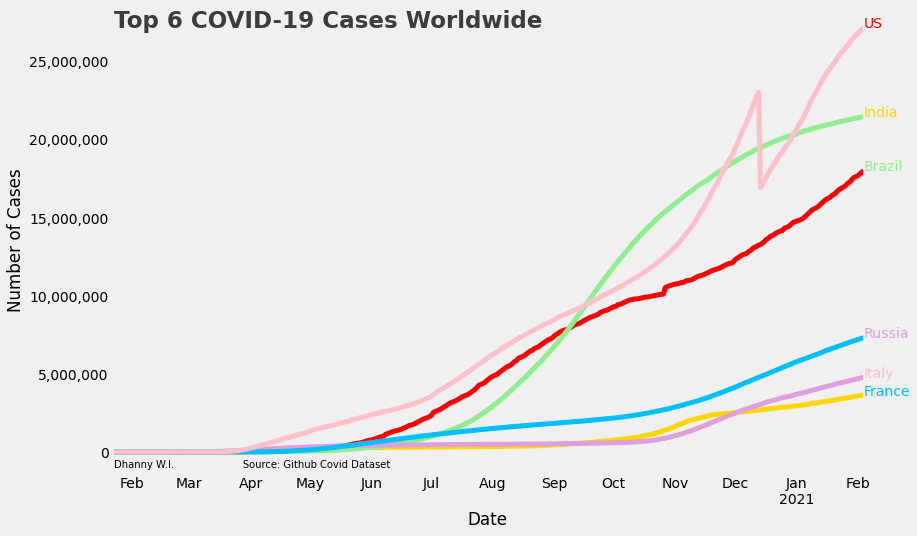

In [6]:
# Generating Colours and Style
colors = {'US':'red', 'India':'gold', 'Brazil':'lightgreen', 'Russia':'plum', 'France':'deepskyblue', 'Italy':'pink'}
plt.style.use('fivethirtyeight')

# Section 7 - Creating the Visualization
plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('Number of Cases')

# Assigning Colour
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country)

# Adding Labels
plot.text(x = covid.index[1], y = int(covid.max().max())+45000, s = "Top 6 COVID-19 Cases Worldwide", fontsize = 23, weight = 'bold', alpha = .75)
plot.text(x = percapita.index[1], y = -1000000,s = 'Dhanny W.I.                      Source: Github Covid Dataset', fontsize = 10)

Text(2020-01-23 00:00:00, -335, 'Dhanny W.I.                      Source: Github Covid Dataset')

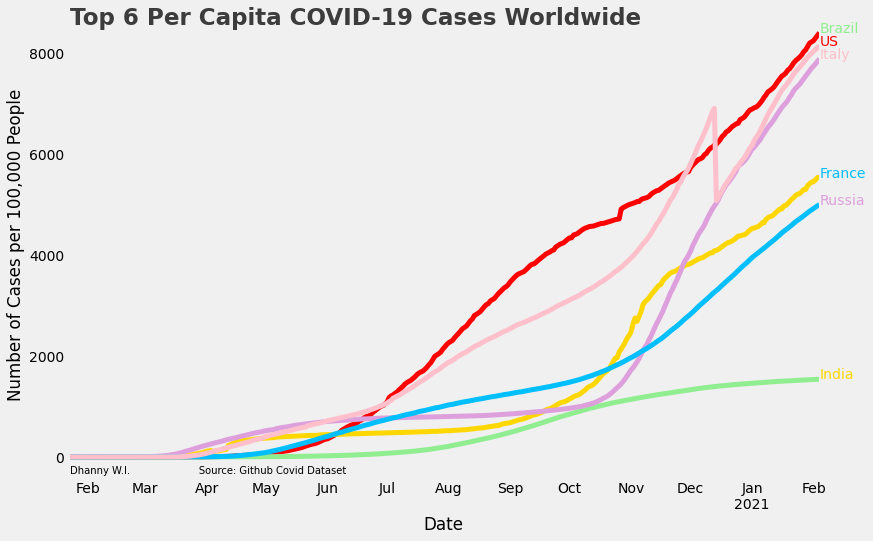

In [7]:
percapitaplot = percapita.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('Number of Cases per 100,000 People')
for country in list(colors.keys()):
    percapitaplot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country)
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+155, s = "Top 6 Per Capita COVID-19 Cases Worldwide", fontsize = 23, weight = 'bold', alpha = .75)
percapitaplot.text(x = percapita.index[1], y = -335,s = 'Dhanny W.I.                      Source: Github Covid Dataset', fontsize = 10)